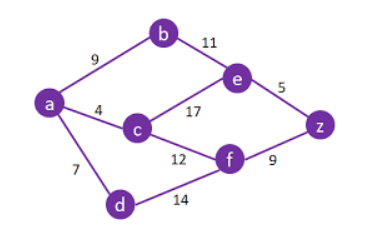

In [9]:
import heapq
def dijkstra(graph, start, end):
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    parent = {start: None}
    pq = [(0, start)]
    while pq:
        dist, node = heapq.heappop(pq)
        if node == end:
            path = []
            while node is not None:
                path.append(node)
                node = parent[node]
            return path[::-1], dist
        for neighbor, weight in graph[node]:
            new_dist = dist + weight
            if new_dist < distances[neighbor]:
                distances[neighbor] = new_dist
                parent[neighbor] = node
                heapq.heappush(pq, (new_dist, neighbor))
    return None, float('inf')
graph1 = {
    'a': [('b', 9), ('c', 4), ('d', 7)],
    'b': [('e', 11)],
    'c': [('e', 17), ('f', 12)],
    'd': [('f', 14)],
    'e': [('z', 5)],
    'f': [('z', 9)],
    'z': []
}
path, dist = dijkstra(graph1, 'a', 'z')
print(f"Shortest path : {path} Cost: {dist}")


Shortest path : ['a', 'c', 'f', 'z'] Cost: 25


In [10]:
from collections import deque
graph1 = {
    'a': ['b', 'c', 'd'],
    'b': ['e'],
    'c': ['e', 'f'],
    'd': ['f'],
    'e': ['z'],
    'f': ['z'],
    'z': []
}
def bfs(graph, start):
    visited = set([start])
    queue = deque([start])
    order = []

    while queue:
        node = queue.popleft()
        order.append(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                visited.add(neighbor)
                queue.append(neighbor)
    return order

print("BFS Traversal from node 'a':", bfs(graph1, 'a'))


BFS Traversal from node 'a': ['a', 'b', 'c', 'd', 'e', 'f', 'z']


In [11]:
def dfs(graph, node, visited=None, order=None):
    if visited is None:
        visited = set()
    if order is None:
        order = []
    visited.add(node)
    order.append(node)
    for neighbor in graph[node]:
        if neighbor not in visited:
            dfs(graph, neighbor, visited, order)
    return order

print("DFS Traversal from node 'a':", dfs(graph1, 'a'))


DFS Traversal from node 'a': ['a', 'b', 'e', 'z', 'c', 'f', 'd']


In [7]:
def detect_cycle(graph):
    visited = set()

    def dfs_cycle(node, parent):
        visited.add(node)
        for neighbor in graph[node]:
            if neighbor not in visited:
                if dfs_cycle(neighbor, node):
                    return True
            elif neighbor != parent:
                print(f"Cycle detected between {node} and {neighbor}")
                return True
        return False

    for node in graph:
        if node not in visited:
            if dfs_cycle(node, None):
                return
    print("No cycle detected.")

detect_cycle(graph1)


Cycle detected between c and e


In [17]:
def is_safe(node, color, color_assign, graph):
    return all(color_assign.get(neigh) != color for neigh in graph[node])

def color_graph(graph, nodes, colors, idx=0, color_assign={}):
    if idx == len(nodes):
        return color_assign

    node = nodes[idx]
    for color in colors:
        if is_safe(node, color, color_assign, graph):
            color_assign[node] = color
            result = color_graph(graph, nodes, colors, idx + 1, color_assign)
            if result:
                return result
            color_assign[node] = None

    return None

graph1 = {
    'a': ['b', 'c', 'd'],
    'b': ['a', 'e'],
    'c': ['a', 'e', 'f'],
    'd': ['a', 'f'],
    'e': ['b', 'c', 'z'],
    'f': ['c', 'd', 'z'],
    'z': ['e', 'f']
}

colors_for_graph1 = ['Red', 'Blue', 'Green']
nodes_graph1 = ['a', 'b', 'c', 'd', 'e', 'f', 'z']
coloring_result = color_graph(graph1, nodes_graph1, colors_for_graph1)

print("Graph 1 Node Coloring with different colors:")
if coloring_result:
    for node, color in coloring_result.items():
        print(f"Node {node} -> {color}")
else:
    print("No valid coloring possible.")


Graph 1 Node Coloring with different colors:
Node a -> Red
Node b -> Blue
Node c -> Blue
Node d -> Blue
Node e -> Red
Node f -> Red
Node z -> Blue
